In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit


In [53]:
df = pd.read_csv("../dataset/UCI_Credit_Card.csv")
print(df.shape)
df.head().T

(30000, 25)


,0,1,2,3,4
ID,1.0,2.0,3.0,4.0,5.0
LIMIT_BAL,20000.0,120000.0,90000.0,50000.0,50000.0
SEX,2.0,2.0,2.0,2.0,1.0
EDUCATION,2.0,2.0,2.0,2.0,2.0
MARRIAGE,1.0,2.0,2.0,1.0,1.0
AGE,24.0,26.0,34.0,37.0,57.0
PAY_0,2.0,-1.0,0.0,0.0,-1.0
PAY_2,2.0,2.0,0.0,0.0,0.0
PAY_3,-1.0,0.0,0.0,0.0,-1.0
PAY_4,-1.0,0.0,0.0,0.0,0.0


In [38]:
df1 = pd.read_csv("../dataset/housing.csv")
df1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [37]:
df1["income_cat"] = pd.cut(
            df1["median_income"],
            bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
            labels=[1, 2, 3, 4, 5]
            )
df1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [33]:
split = StratifiedShuffleSplit(
                n_splits=1, test_size=0.2, random_state=42)
strat_train_set = None
strat_test_set = None
for train_index, test_index in split.split(df1, df1["income_cat"]):
                strat_train_set = df1.loc[train_index].drop(
                    ["income_cat"], axis=1)
                strat_test_set = df1.loc[test_index].drop(
                    ["income_cat"], axis=1)

<AxesSubplot:>

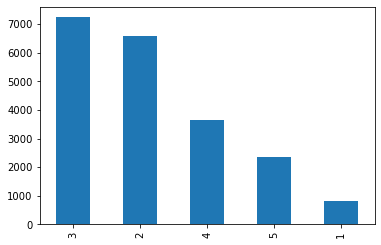

In [27]:
df1["income_cat"].value_counts().plot(kind='bar')